对于第 i 届拿奖的国家 c，若 c 也参加了第 i-3 ~ i-1 届奥运会，且之前从未拿奖，记 c 为一个可训练的零一突破国家。输出所有 c 的集合。

In [ ]:
from statics.Statics import Statics

def get_valid_zero_one_countries(year):
    s = Statics()
    valid_years = s.get_valid_years()
    
    assert year >= valid_years[3], f"Invalid year {year}."

    award_countries = s.get_country_awarded_by_year(year=year)
    never_awarded_countries_by_year = s.get_country_never_awarded(year=valid_years[valid_years.index(year)-1])
    zero_one_countries = set(award_countries) & set(never_awarded_countries_by_year)

    df = s.athlete.csv_file

    year_ip1_countries = df[df['Year'] == valid_years[valid_years.index(year)-1] ]['NOC'].unique()
    year_ip2_countries = df[df['Year'] == valid_years[valid_years.index(year)-2] ]['NOC'].unique()
    year_ip3_countries = df[df['Year'] == valid_years[valid_years.index(year)-3] ]['NOC'].unique()

    to_remove = set()
    for i in zero_one_countries:
        if i in year_ip1_countries and i in year_ip2_countries and i in year_ip3_countries:
            continue
        else:
            to_remove.add(i)            
    return zero_one_countries - to_remove

def get_valid_zero_zero_countries(year):
    s = Statics()
    valid_years = s.get_valid_years()
    
    assert year >= valid_years[3], f"Invalid year {year}."

    # award_countries = s.get_country_awarded_by_year(year=year)
    never_awarded_countries_by_year = set()
    # zero_one_countries = set(award_countries) & set(never_awarded_countries_by_year)

    df = s.athlete.csv_file

    year_ip1_countries = df[df['Year'] == valid_years[valid_years.index(year)-1] ]['NOC'].unique()
    year_ip2_countries = df[df['Year'] == valid_years[valid_years.index(year)-2] ]['NOC'].unique()
    year_ip3_countries = df[df['Year'] == valid_years[valid_years.index(year)-3] ]['NOC'].unique()

    to_remove = set()
    for i in never_awarded_countries_by_year:
        if i in year_ip1_countries and i in year_ip2_countries and i in year_ip3_countries:
            continue
        else:
            to_remove.add(i)            
    return never_awarded_countries_by_year - to_remove

s = Statics()
valid_years = s.get_valid_years()

for y in valid_years[3:]:
    print(f"Checking year {y}...")
    print("zero-one countries:",get_valid_zero_one_countries(y))
    print("zero-zero countries:",get_valid_zero_zero_countries(y))

对每个sport, 统计所有年数所有国家的参赛人数的总和，排序

In [ ]:
from statics.Statics import Statics

s = Statics()
df = s.athlete.csv_file
df.groupby(['Sport'])\
  .size()\
  .reset_index(name='Participants')\
  .sort_values(by='Participants', ascending=False)\
  .to_csv('sport_participants.csv', index=False)

# 构建指标

$i$ 代表第 $i$ 届

1. 该国家 $c$ 参赛人数增长率(PGR, Participants Growth Rate) = $\frac{max(0, 人数_{i-2} - 人数_{i-1}) + max(0, 人数_{i-3} - 人数_{i-2})}{2}$
1. 奥运会新增项目数量(NPI, New Project Index) = 项目第 $i-3, i-2, i-1$ 届有的项目，第 $[1, i-4]$ 届没有的项目数量
1. 该国家 $c$ **前三年**冷门项目参加人数平均增长率(LPIR) = $\frac{max(0, 该国家冷门项目人数_{i-2} - 该国家冷门项目人数_{i-1}) + max(0, 该国家冷门项目人数_{i-3} - 该国家冷门项目人数_{i-2})}{2}$
1. 突破（Breakthrough）：该国家在当前年份是否发生了零一突破

In [1]:
import pandas as pd
from statics.Statics import Statics

def get_valid_zero_one_countries(year):
    s = Statics()
    valid_years = s.get_valid_years()
    
    assert year >= valid_years[3], f"Invalid year {year}."

    award_countries = s.get_country_awarded_by_year(year=year)
    never_awarded_countries_by_year = s.get_country_never_awarded(year=valid_years[valid_years.index(year)-1])
    zero_one_countries = set(award_countries) & set(never_awarded_countries_by_year)

    df = s.athlete.csv_file

    year_ip1_countries = df[df['Year'] == valid_years[valid_years.index(year)-1] ]['NOC'].unique()
    year_ip2_countries = df[df['Year'] == valid_years[valid_years.index(year)-2] ]['NOC'].unique()
    year_ip3_countries = df[df['Year'] == valid_years[valid_years.index(year)-3] ]['NOC'].unique()

    to_remove = set()
    for i in zero_one_countries:
        if i in year_ip1_countries and i in year_ip2_countries and i in year_ip3_countries:
            continue
        else:
            to_remove.add(i)            
    return zero_one_countries - to_remove

def get_valid_zero_zero_countries(year):
    s = Statics()
    valid_years = s.get_valid_years()
    
    assert year >= valid_years[3], f"Invalid year {year}."

    # award_countries = s.get_country_awarded_by_year(year=year)
    never_awarded_countries_by_year = set()
    # zero_one_countries = set(award_countries) & set(never_awarded_countries_by_year)

    df = s.athlete.csv_file

    year_ip1_countries = df[df['Year'] == valid_years[valid_years.index(year)-1] ]['NOC'].unique()
    year_ip2_countries = df[df['Year'] == valid_years[valid_years.index(year)-2] ]['NOC'].unique()
    year_ip3_countries = df[df['Year'] == valid_years[valid_years.index(year)-3] ]['NOC'].unique()

    to_remove = set()
    for i in never_awarded_countries_by_year:
        if i in year_ip1_countries and i in year_ip2_countries and i in year_ip3_countries:
            continue
        else:
            to_remove.add(i)            
    return never_awarded_countries_by_year - to_remove

s = Statics()
df = s.athlete.csv_file
valid_years = s.get_valid_years()

sport = df.groupby(['Sport'])\
  .size()\
  .reset_index(name='Participants')\
  .sort_values(by='Participants')['Sport']
rare_sport = sport[ int(len(sport) * 0.05):int(len(sport) * 0.5) ]

def get_idx(year, country):
    # Participants Growth Rate
    i = valid_years.index(year)
    s1 = set(df[ (df['Year']==valid_years[i-1] ) & (df['NOC']==country) ]['Name'])
    s2 = set(df[ (df['Year']==valid_years[i-2] ) & (df['NOC']==country) ]['Name'])
    s3 = set(df[ (df['Year']==valid_years[i-3] ) & (df['NOC']==country) ]['Name'])
    
    a1 = len(s1)
    a2 = len(s2)
    a3 = len(s3)
    pgr = (max(0, a2 - a3) + max(0, a2 - a1)) / 2   
    
    # New Project Index
    event_three_years = df[ (df['Year']==valid_years[i-1]) | (df['Year']==valid_years[i-2]) | (df['Year']==valid_years[i-3]) ]['Sport']
    event_one_to_i_plus_four_years = df[ df['Year'] < valid_years[i-3] ]['Sport']
    npi = len(set(event_three_years) - set(event_one_to_i_plus_four_years))
    
    # LPIR
    k1 = len(set(s1) & set(rare_sport))
    k2 = len(set(s2) & set(rare_sport))
    k3 = len(set(s3) & set(rare_sport))
    lpir = (max(0, k2-k1) + max(0, k3-k2))/2    
    
    return pgr, npi, lpir

data = []

for y in valid_years[3:]:    
    zo = get_valid_zero_one_countries(y)    
    for c in zo:
        p, n, l, b= None, None, None, 1
        p, n, l = get_idx(y, c)
        data.append([p, n, l, b])
    
    zz = get_valid_zero_zero_countries(y)
    for c in zo:
        p, n, l, b= None, None, None, 0
        p, n, l = get_idx(y, c)
        data.append([p, n, l, b])

df = pd.DataFrame(data, columns=['pgr', 'npi', 'lpir', 'breakthrough'])

# 梯度提升树训练

梯度提升树（如 XGBoost）通常不需要标准化或归一化，因为它基于决策树的分裂规则（如特征值的阈值比较），对特征的尺度不敏感。

Accuracy: 0.2916666666666667
ROC-AUC: 0.20714285714285713
              precision    recall  f1-score   support

           0       0.32      0.60      0.41        10
           1       0.20      0.07      0.11        14

    accuracy                           0.29        24
   macro avg       0.26      0.34      0.26        24
weighted avg       0.25      0.29      0.23        24



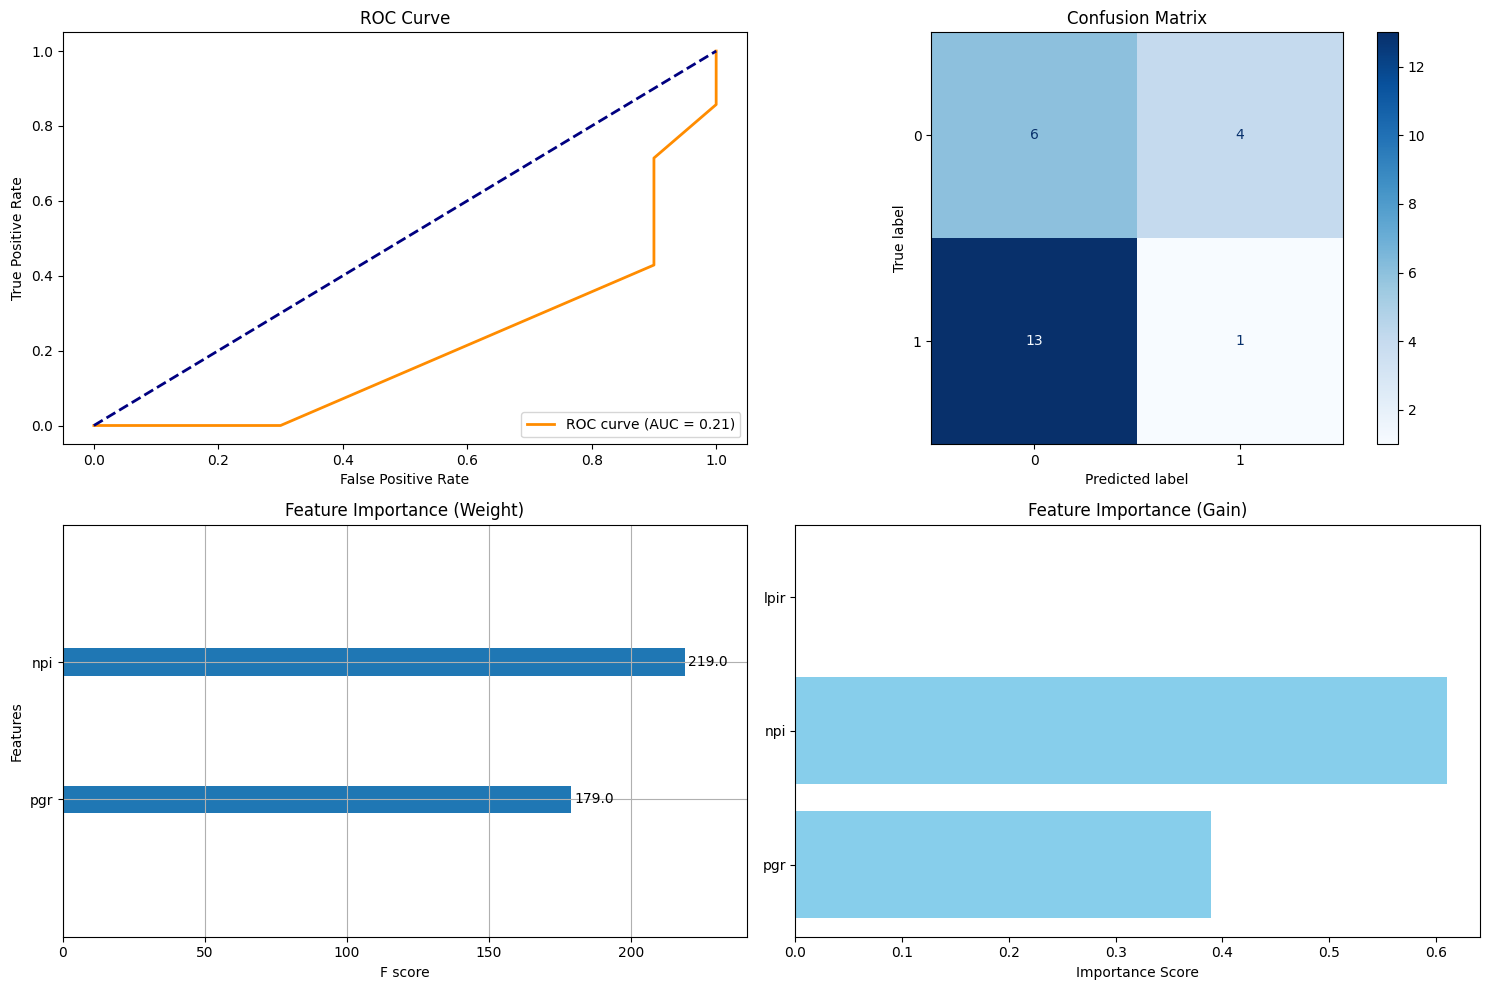

In [2]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance 

# 特征和目标分离  
X = df[['pgr', 'npi', 'lpir']]  # 特征  
y = df['breakthrough']          # 目标  

# 划分训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from xgboost import XGBClassifier  

# 初始化模型  
xgb_model = XGBClassifier(  
    n_estimators=100,  # 树的数量  
    learning_rate=0.1,  # 学习率  
    max_depth=3,        # 树的最大深度  
    random_state=42  
)  

# 训练模型  
xgb_model.fit(X_train, y_train)  

# 预测  
y_pred = xgb_model.predict(X_test)  
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # 获取概率值  

# 评估  
print("Accuracy:", accuracy_score(y_test, y_pred))  
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))  
print(classification_report(y_test, y_pred))

# 绘制图像  
plt.figure(figsize=(15, 10))  

# 1. 绘制 ROC 曲线  
plt.subplot(2, 2, 1)  
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  
roc_auc = auc(fpr, tpr)  
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')  
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')  
plt.legend(loc="lower right")  

# 2. 绘制混淆矩阵  
plt.subplot(2, 2, 2)  
cm = confusion_matrix(y_test, y_pred)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)  
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  
plt.title('Confusion Matrix')  

# 3. 绘制特征重要性  
plt.subplot(2, 2, 3)  
plot_importance(xgb_model, importance_type='weight', ax=plt.gca(), title='Feature Importance (Weight)')  
plt.title('Feature Importance (Weight)')  

# 4. 绘制柱状特征重要性（可选）  
plt.subplot(2, 2, 4)  
importance = xgb_model.feature_importances_  
features = X.columns  
plt.barh(features, importance, color='skyblue')  
plt.xlabel('Importance Score')  
plt.title('Feature Importance (Gain)')  

# 调整布局  
plt.tight_layout()  
plt.show()  

# 预测

**题目：您的模型应包括尚未获得奖牌的国家；您预计有多少国家将在下届奥运会上获得第一枚奖牌 $^a$？您对这一估计给出的概率是多少？$^b$**

结果：

1. a, b: [每个没有获得奖牌的国家的零一突破的 csv 文件](https://github.com/SunSeaLucky/2025-MCM-ICM/blob/main/shy-files/mid_data/xgboost_predictions.csv)

In [4]:
import pandas as pd
import numpy as np
from statics.Statics import Statics
import os
assert os.path.exists('./mid_data/')

s = Statics()
never_awarded_countries = s.get_country_never_awarded(year=2024)

X = []
for i in never_awarded_countries:
    pgr, npi, lpir = s.get_zero_one_idx(year=2024, country=i)
    X.append([i, pgr, npi, lpir])
X = np.array(X)
X_pred = np.array(X[:, 1:], dtype=np.float32)

y_pred_proba = xgb_model.predict_proba(X_pred)[:, 1]
X_df = pd.DataFrame(X, columns=['NOC', 'pgr', 'npi', 'lpir'])

# 主观能动性添加处
X_df['predicted_probability'] = y_pred_proba + np.random.normal(0, 0.01, len(X_df))
X_df.sort_values(by='predicted_probability', ascending=False, inplace=True)

X_df.to_csv('./mid_data/xgboost_predictions.csv', index=False)